# Cálculo das Probabilidades de Entrada em benefícios

Os cálculos são baseados no novo modelo de projeção da Fazenda.

Etapas:
 1. Obter o nome de todas as tabelas dentro do arquivo     
 2. Salvar todas as tabelas da planilha
     * As tabelas serão salvas em uma estrutura de dados do tipo DataFrame
     * Os DataFrames serão salvos em dicionários (hashtables) para facilitar o acesso
 3. Calcula as probabilidades ...

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ano de referência para o cálculo das probabilidades
ano_prob = 2014

# Arquivo com os dados da Fazenda
arquivo = '../../datasets/FAZENDA/dados_fazenda.xlsx'

# Função que retorna uma lista de benefícios de acordo como filtro
def get_lista(filtros=[], info=''):

# A tag info é usada no momento de leitura das tabelas no arquivo
# Es = estoque
# Co = conceções
# Ce = cessações

# Exemplos de filtros:
# Apin = Aposentadoria por Invalidez
# Auxd = Auxílio doença
# SalMat = Salário Maternidade
    
    # Lista com todos os benefícios utilizando o mesmo padrão do simulador da Fazenda    
    lista = ["ApinUrbPisoH", "ApinUrbPisoM", "ApidUrbPisoH", "ApidUrbPisoM", 
                      "AtcnUrbPisoH", "AtcnUrbPisoM", "AtceUrbPisoH", "AtceUrbPisoM",
                      "AtcpUrbPisoH", "AtcpUrbPisoM", "AtcdUrbPisoH", "AtcdUrbPisoM",
                      "AinvUrbPisoH", "AinvUrbPisoM", 

                      "ApinRurH", "ApinRurM", "ApidRurH", "ApidRurM",
                      "AtcnRurH", "AtcnRurM", "AtceRurH", "AtceRurM",
                      "AtcpRurH", "AtcpRurM", "AtcdRurH","AtcdRurM",
                      "AinvRurH", "AinvRurM",  

                      "ApinUrbAcimH", "ApinUrbAcimM", "ApidUrbAcimH", "ApidUrbAcimM", 
                      "AtcnUrbAcimH", "AtcnUrbAcimM", "AtceUrbAcimH", "AtceUrbAcimM", 
                      "AtcpUrbAcimH", "AtcpUrbAcimM", "AtcdUrbAcimH", "AtcdUrbAcimM",
                      "AinvUrbAcimH", "AinvUrbAcimM", 
             
                      "AuxdUrbPisoH", "AuxdUrbPisoM", "AuxdRurH", "AuxdRurM",                
                      "AuxdUrbAcimH", "AuxdUrbAcimM", "AuxaUrbPisoH", "AuxaUrbPisoM",
                      "AuxrUrbPisoH", "AuxrUrbPisoM", "AuxaRurH", "AuxaRurM", 
                      "AuxrRurH", "AuxrRurM", "AuxaUrbAcimH",
                      "AuxaUrbAcimM", "AuxrUrbAcimH", "AuxrUrbAcimM",
             
                      "SalMatUrbPisoM","SalMatRurM", "SalMatUrbAcimM" , 
                      "PensUrbPisoH", "PensUrbPisoM", "PensRurH", 
                      "PensRurM", "PensUrbAcimH", "PensUrbAcimM" , 
                      "LoasIdoH", "LoasIdoM", "LoasDefH", 
                      "LoasDefM", "RmvH", "RmvM"]
    
    # lista que será retornada
    lista_final = []
    
    # Verifica se a lista está vazia, nesse caso retorna todos os benefícios
    if len(filtros) == 0:   
        for l in lista:
            lista_final.append(info+l)       
    
    # Aplica o filtro na lista
    else:
        for f in filtros:  
            for l in lista:
                if f in l:
                    lista_final.append(info+l)  
    
    return lista_final



Em seguida carregamos o arquivo Excel e obtemos cada uma das tabelas listadas nas variáveis

In [100]:
# lendo arquivo
xls = pd.ExcelFile(arquivo)

# Lista com as tabelas com dados ausentes
tabsIncompletas = []
tabsInexistentes = []

# Dicionários que armazenarão os estoques, quantidades de benefícios concedidos e cessados
# e probabilidades
estoques = {}
concessoes = {}
cessacoes = {}
prob = {}

# Função que extrai as tabelas do arquivo
# Recebe o arquivo (planilha) e a lista de tabelas a serem extraídas
def carrega_dados(lista, xls):        
    
    # Dicionário que salva as tabelas
    colecao_tabelas = {}
    
    # Lê cada uma das tabelas dentro do arquivo 
    # Converte cada tabela em um DataFrame e salva no dicionário
    for i in lista:
        chave = i[2:] # Remove os 2 primeiro caracteres (ex: 'EsApidRurH' -> 'ApidRurH')
        try:
            colecao_tabelas[chave] = xls.parse(i, index_col=0)                 # Converte a tabela para um DataFrame
            colecao_tabelas[chave].drop('Total', inplace=True)                 # Elimina a linha 'Total'
            colecao_tabelas[chave].dropna(thresh=89, axis=1, inplace=True)     # Elimina colunas com dados ausentes
            colecao_tabelas[chave].dropna(how='all', inplace=True)             # Elimina linhas completamente vazias

            # Remove as tabelas que possuem dados ausentes
            if colecao_tabelas[chave].empty:                     
                tabsIncompletas.append(i)    # Salva o nome da tabela incompleta      
                colecao_tabelas.pop(chave)   # Remove a tabela

        except:
            # Salva o nome das tabelas que não existem
            tabsInexistentes.append(i)        
            
    return colecao_tabelas



# Carrega os dados
estoques = carrega_dados(get_lista([],'Es'), xls)    # get_listas recebe um filtro vazio, retornando todas os benefícios
concessoes = carrega_dados(get_lista([],'Co'), xls)
cessacoes = carrega_dados(get_lista([],'Ce'), xls)

# Exibe algumas informações sobre as tabelas
print('Total de tabelas de ESTOQUES: %s' %len(estoques))        
print('Total de tabelas de CONCESSÕES: %s' %len(concessoes))        
print('Total de tabelas de CESSAÇÕES: %s' %len(cessacoes))        
print('Total de tabelas inexistentes: %s' %len(tabsInexistentes))
print('Total de tabelas incompletas e removidas: %s' %len(tabsIncompletas))
print('Total de tabelas carregadas: %s' %(len(estoques)+len(concessoes)+len(cessacoes)))

Total de tabelas de ESTOQUES: 66
Total de tabelas de CONCESSÕES: 52
Total de tabelas de CESSAÇÕES: 46
Total de tabelas inexistentes: 35
Total de tabelas incompletas e removidas: 26
Total de tabelas carregadas: 164


Após carregar todos os dados é possível ver o conjunto de dados de cada tabela.

In [101]:
# A execução desta célula é opcional

# Função que obtém cada um das tabelas do dicionário e exibe parte do conteúdo
def print_tabelas(colecao, titulo=''):
    for i in colecao:    
        print('%s - Tabela: %s' % (titulo, i))
        print(colecao[i])
        print('------------------\n')


# Exibe o parte do conteúdo de cada tabela
print_tabelas(estoques, 'Estoques')
print_tabelas(concessoes, 'Concessões')
print_tabelas(cessacoes, 'Cessações')

Estoques - Tabela: ApinUrbPisoH
        2010          2011          2012          2013          2014
ÍNDICE                                                              
0        0.0      0.000000      0.000000      0.000000      0.000000
1        0.0      0.000000      0.000000      0.000000      0.000000
2        0.0      0.000000      0.000000      0.000000      0.000000
3        0.0      0.000000      0.000000      0.000000      0.000000
4        0.0      0.000000      0.000000      0.000000      0.000000
5        0.0      0.000000      0.000000      0.000000      0.000000
6        0.0      0.000000      0.000000      0.000000      0.000000
7        0.0      0.000000      0.000000      0.000000      0.000000
8        0.0      0.000000      0.000000      0.000000      0.000000
9        0.0      0.000000      0.000000      0.000000      0.000000
10       0.0      0.000000      0.000000      0.000000      0.000000
11       0.0      0.000000      0.000000      0.000000      0.000000
12

In [102]:
#### Calcula probabilidades de entrada em aposentadorias
tag_apos= ['Apin', 'Atcn', 'Apid', 'Atcp', 'Ainv', 'Atce', 'Atcd']

for beneficio in get_lista(tag_apos):
    # Verifica se o possui os dados de estoque e concessões do benefício
    if beneficio in estoques.keys() and beneficio in concessoes.keys():
        probabilidades = concessoes[beneficio][ano_prob] / (estoques[beneficio][ano_prob-1] + (concessoes[beneficio][ano_prob]/2))
        prob[beneficio] = pd.DataFrame(probabilidades)
        prob[beneficio].columns = [ano_prob]                 # nome da coluna no Dataframe
        prob[beneficio][ano_prob].fillna(0, inplace = True)  # Substitui os NaN (not a number) por zeros

    

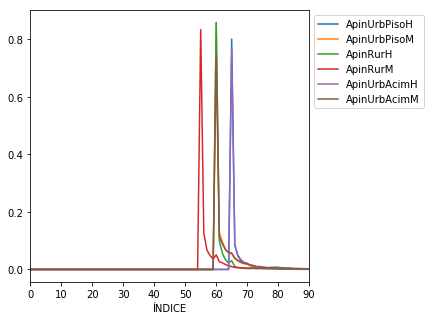

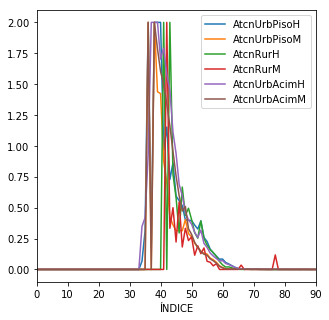

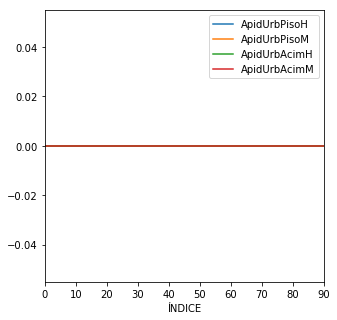

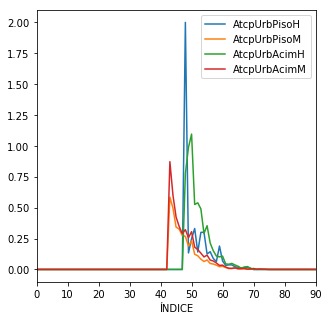

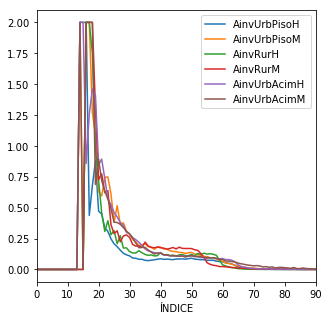

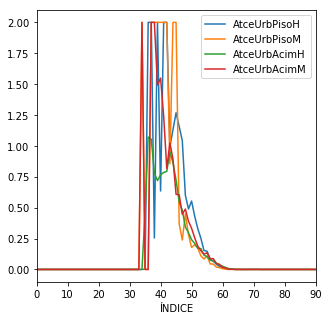

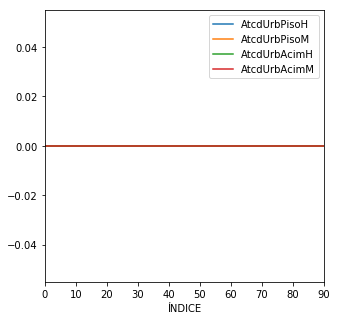

In [103]:
# Plota as figuras para cada tipo de aposentadoria
for t in tag_apos:
    temp = pd.DataFrame()
    for beneficio in get_lista([t]):
        if beneficio in prob.keys():
            temp[beneficio] = prob[beneficio][2014]

    temp.plot(figsize = (5,5)).legend(bbox_to_anchor=(1, 1))

## Cáculo das probabilidades de morte

In [104]:
populacao = carrega_dados(['PopIbgeH', 'PopIbgeM'], xls)

ano_inicio = 2014
ano_fim = 2060

periodo=list(range(ano_inicio,ano_fim))

prob = {}

def calc_prob_morte_ufpa(pop, sexo):

    periodo = list(pop[sexo].columns)
    txMort = pd.DataFrame(index=range(0,91), columns=periodo) 
        
    for ano in periodo[0:-1]:
        for idade in range(0,89):
            pop_atual = pop[sexo][ano][idade]            
            pop_prox_ano = pop[sexo][ano+1][idade+1]                
            txMort[ano][idade] = 1 - (pop_prox_ano/pop_atual)
     
        # Calculo para a idade de 89 anos
        txMort[ano][89] = txMort[ano][88]

        # Calculo para a idade de 90 anos
        txMort[ano][90] = 1 - (pop[sexo][ano+1][90] - pop[sexo][ano][89] * (1 - txMort[ano][89])) / pop[sexo][ano][90]
     
    # Repete a Prob do ultimo ano como valor do antepenultimo
    txMort[periodo[-1]] = txMort[periodo[-2]]

    return txMort

 
for sexo in populacao.keys():            
    prob['txMort'+sexo[-1]] = calc_prob_morte_ufpa(populacao, sexo) 



In [112]:
# Casos em que o número de Concessões é maior que o Estoque (O que gera erro no cálculo das probabilidades)

erros = concessoes['AinvRurH'][ano_prob-1].shift(1).gt(estoques['AinvRurH'][ano_prob])

temp = estoques['AinvRurH'][ano_prob][erros] + concessoes['AinvRurH'][ano_prob-1].shift(1)[erros]

#estoques['AinvRurH'][ano_prob][erros] = temp
#novo = concessoes['AinvRurH'][ano_prob-1][erros].shift(1) + estoques['AinvRurH'][ano_prob].shift(1)

#concessoes['AinvRurH'][ano_prob-1][erros]
#estoques['AinvRurH'][ano_prob][erros].shift(0)

#estoques['AinvRurH'][ano_prob]

erros
temp


ÍNDICE
17     5.000047
18     9.000023
19    20.000164
dtype: float64